# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [522]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [523]:
xlsx = pd.ExcelFile('European Measurements.xlsx')
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values
print(data)

[[-9.70000000e+00  1.93303385e+03]
 [-9.10000000e+00  3.07678202e+03]
 [-7.70000000e+00  4.61959427e+03]
 [-7.30000000e+00  4.87640388e+03]
 [-7.20000000e+00  5.27621777e+03]
 [-6.20000000e+00  5.76967851e+03]
 [-4.70000000e+00  5.26728526e+03]
 [-4.10000000e+00  6.40777934e+03]
 [-3.30000000e+00  6.05631612e+03]
 [-2.70000000e+00  6.10216500e+03]
 [-2.50000000e+00  5.18359545e+03]
 [-2.30000000e+00  7.03041233e+03]
 [-1.90000000e+00  5.69790109e+03]
 [-1.80000000e+00  5.42920417e+03]
 [-1.20000000e+00  5.23662184e+03]
 [-9.00000000e-01  6.28278124e+03]
 [-1.00000000e-01  6.53285159e+03]
 [ 2.00000000e-01  5.78284515e+03]
 [ 3.00000000e-01  6.57445814e+03]
 [ 4.00000000e-01  5.25761264e+03]
 [ 1.10000000e+00  5.86568880e+03]
 [ 1.50000000e+00  6.92127198e+03]
 [ 1.60000000e+00  6.15982519e+03]
 [ 2.10000000e+00  6.87265063e+03]
 [ 2.20000000e+00  5.57408399e+03]
 [ 2.50000000e+00  5.88485867e+03]
 [ 5.20000000e+00  6.75130936e+03]
 [ 5.40000000e+00  7.32399792e+03]
 [ 5.90000000e+00  7

### Simple GA mechanism

In [524]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0
        for event in range(len(data)):
#             error = 0
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    return pop[sorted_fitness_args[-num_parents:],:]
    # parents = np.empty((num_parents, pop.shape[1]))
    # for parent_num in range(num_parents):
    #     max_fitness_idx = np.where(fitness == np.max(fitness))
    #     max_fitness_idx = max_fitness_idx[0][0]
    #     parents[parent_num, :] = pop[max_fitness_idx, :]
    #     fitness[max_fitness_idx] = -99999999999
    # return parents

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

In [531]:
new_population = np.random.randint(low=0, high=10000, size=population_size)
print(np.sum(fitness_function(data, new_population)))

1.2453584025653114e-10


The population of the first generation: 
[[1028 6777 6531  398]
 [8644  667 6117 6072]
 [7878 4562 7945 1455]
 ...
 [7703 3222 1640 3090]
 [7759 1801  450 7824]
 [9121 6159 5146  958]]

Evolution:
Generation =  0 	Best fitness =  63650535621.72408
Generation =  1 	Best fitness =  41723268165.74919
Generation =  2 	Best fitness =  37934862744.25891
Generation =  3 	Best fitness =  18664347019.73193
Generation =  4 	Best fitness =  16707529083.49156
Generation =  5 	Best fitness =  16707529083.49156
Generation =  6 	Best fitness =  16707529083.49156
Generation =  7 	Best fitness =  5969341001.22943
Generation =  8 	Best fitness =  4820011880.60506
Generation =  9 	Best fitness =  4820011880.60506
Generation =  10 	Best fitness =  3637644953.55057
Generation =  11 	Best fitness =  3637644953.55057
Generation =  12 	Best fitness =  3637644953.55057
Generation =  13 	Best fitness =  3637644953.55057
Generation =  14 	Best fitness =  2612055089.90843
Generation =  15 	Best fitness =  2485530

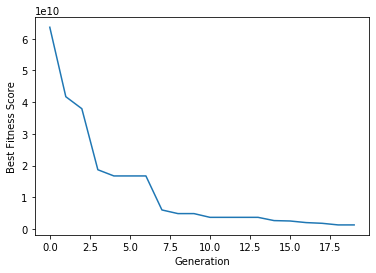

In [532]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []
pop_analytic = [4.8, 12.1, 53.2 , 6219]

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Challenge 231
Implement a new and improved GA, based on the one above, by taking the following actions:

1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Consider different GA parameters in order to reach better results

First, I wanted to understand a bit more the data I was working with. I am going to print the data, the analytic solution and our GA solution.
We can see our generated solution is really bad

In [533]:
#generate once the analytic curve
y_hat_analytic=[]
error = 0
for event in range(len(data)):
    event_time = data[event][0]
    event_measured = data[event][1]
    event_analytic = pop_analytic[0]*event_time**3 + pop_analytic[1]*event_time**2 + pop_analytic[2]*event_time + pop_analytic[3]
    y_hat_analytic.append(event_analytic)
    error +=(event_analytic - event_measured)**2
y_pred_analytic = np.array(y_hat_analytic)
fitness_analytic = 1/error
print(fitness_analytic)

9.589037792186927e-08


In [534]:
def run_all(new_population):
#     new_population = np.random.randint(low=0, high=10000, size=population_size)
    for generation in range(number_of_generations):
        fitness = fitness_function(data, new_population)
        best_outputs.append(round(1/np.max(fitness),5))
        parents = biased_selection(new_population, fitness, number_of_parents)
        offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
        offspring_mutation = mutation(offspring_recombination)
        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation
    fitness = fitness_function(data, new_population)
    best_match_idx = np.where(fitness == np.max(fitness))
#     print("Our solution: ", new_population[best_match_idx, :], )
    print("Our solution: ", new_population[best_match_idx, :], ", fitness scoree:", round(1/np.max(fitness),5))
    return new_population[best_match_idx, :]

In [535]:
def plot_all(pop):
    print(f"Analytic solution:", pop_analytic, ", fitness score:",fitness_analytic)
    y_hat = []
    y_hat_analytic = []
    for event in range(len(data)):
                event_time = data[event][0]
                event_expected = pop[0][0][0]*event_time**3 + pop[0][0][1]*event_time**2 + pop[0][0][2]*event_time + pop[0][0][3]
#                 event_analytic = pop_analytic[0]*event_time**3 + pop_analytic[1]*event_time**2 + pop_analytic[2]*event_time + pop_analytic[3]
                y_hat.append(event_expected)
#                 y_hat_analytic.append(event_analytic)
    y_pred = np.array(y_hat)
#     y_pred_analytic = np.array(y_hat_analytic)
    plt.plot(data[:,0], data[:,1], label="Original data")
    plt.plot(data[:,0], y_pred, label="GA")
    plt.plot(data[:,0], y_pred_analytic, label="Analytic")
    plt.legend()

Analytic solution: [4.8, 12.1, 53.2, 6219] , fitness score: 9.589037792186927e-08


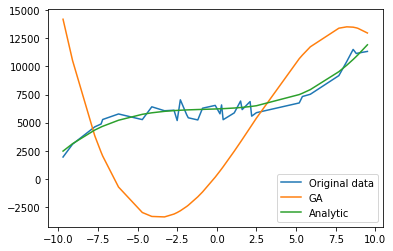

In [536]:
plot_all(new_population[best_match_idx, :])

#### Answer 1

The new definition of biased_selection keeps an adjustable percentage of the best chromosomes. This is to avoid degeneration. Then  uses a binomial distribution based on fitness score to keep parents. 
I didn't show the result to simplify the notebook but it didn't improve that much

In [627]:
def biased_selection(pop, fitness, num_parents):
    prob = np.linspace(0.0, 1.0, pop.shape[0])
    keep_elite_nb = pop.shape[0] * keep_elite // 100
    prob[-keep_elite_nb:] = 1
    mask = np.random.binomial(1, prob,  pop.shape[0])
#     print("fitness.shape:", len(fitness), "mask.shape:", mask.shape, "prob.shape:", prob.shape, "pop.shape:", pop.shape)
    parent = pop[np.argsort(fitness)[mask==1], :]
    if parent.shape[0] > num_parents:
        return parent[-num_parents:]
    return parent

Our solution:  [[[  -5  361  772 1041]]] , fitness scoree: 5105485392.3782
Analytic solution: [4.8, 12.1, 53.2, 6219] , fitness score: 9.589037792186927e-08


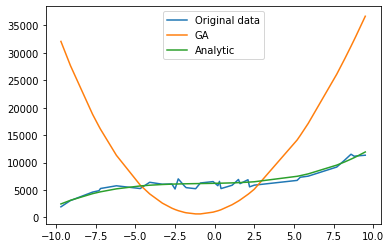

In [538]:
keep_elite = 1
new_population = np.random.randint(low=0, high=10000, size=population_size)
pop = run_all(new_population)
plot_all(pop)

#### Answer 2

Results are random but apparently we are getting much better result

In [539]:
def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
#     recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0] 
        parent2_idx = (k+1)%parents.shape[0]
        dominant_gene_mat = np.random.choice([True, False], formula_degree)
#         print("dominant_gene_mat.shape",dominant_gene_mat.shape)
#         print("offspring.shape",offspring.shape)
#         print("parents.shape",parents.shape)
#         print(dominant_gene_mat)
        offspring[k][dominant_gene_mat] = parents[parent1_idx][dominant_gene_mat]
        offspring[k][~dominant_gene_mat] = parents[parent2_idx][~dominant_gene_mat]        
    return offspring

Our solution:  [[[ -10   40 1216 5825]]] , fitness scoree: 259143377.0839
Analytic solution: [4.8, 12.1, 53.2, 6219] , fitness score: 9.589037792186927e-08


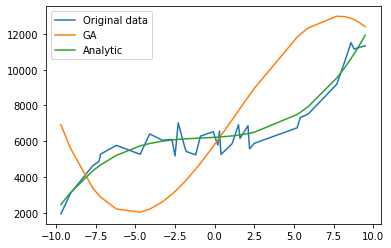

In [540]:
new_population = np.random.randint(low=0, high=10000, size=population_size)
pop = run_all(new_population)
plot_all(pop)

#### Answer 3

Mutation are done randomly +/- 100%. We could have make it without loop.
Result are getting close to the perfection


In [552]:
def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        print("mutation from ", offspring_recombination[idx, random_index], "to ",offspring_recombination[idx, random_index] * random_value / 100)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] * random_value / 100
    return offspring_recombination

Our solution:  [[[   5    8   37 6445]]] , fitness scoree: 12840325.78325
Analytic solution: [4.8, 12.1, 53.2, 6219] , fitness score: 9.589037792186927e-08


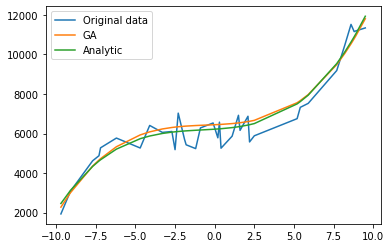

In [542]:
new_population = np.random.randint(low=0, high=10000, size=population_size)
pop = run_all(new_population)
plot_all(pop)

#### Answer 4

We stop when the fitness is close enough to what we want (sometimes I got good result quickly sometime it takes more generations)

In [543]:
threshold = 13567890


def run_all(new_population):
#     new_population = np.random.randint(low=0, high=10000, size=population_size)
#     for generation in range(number_of_generations):
    score_f = fitness_function(data, new_population)
    score = round(1/np.max(score_f),5)
    generation = 0
    while (score > threshold):
        generation += 1
        fitness = fitness_function(data, new_population)
        parents = biased_selection(new_population, fitness, number_of_parents)
        offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
        offspring_mutation = mutation(offspring_recombination)
        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation
        score = fitness_function(data, new_population)
        score = round(1/np.max(score),5)
        print(f"generation:{generation}, score:{score}")
    fitness = fitness_function(data, new_population)
    best_match_idx = np.where(fitness == np.max(fitness))
    print("Our solution: ", new_population[best_match_idx, :])
    return new_population[best_match_idx, :]

generation:1, score:93408525673.9383
generation:2, score:11622987044.08729
generation:3, score:232028639.69658
generation:4, score:232028639.69658
generation:5, score:232028639.69658
generation:6, score:232028639.69658
generation:7, score:232028639.69658
generation:8, score:232028639.69658
generation:9, score:53629031.69227
generation:10, score:53629031.69227
generation:11, score:53629031.69227
generation:12, score:53629031.69227
generation:13, score:53629031.69227
generation:14, score:31455148.41132
generation:15, score:31455148.41132
generation:16, score:31455148.41132
generation:17, score:31455148.41132
generation:18, score:29290094.85734
generation:19, score:29290094.85734
generation:20, score:29290094.85734
generation:21, score:29290094.85734
generation:22, score:29290094.85734
generation:23, score:12408763.51751
Our solution:  [[[   5   20  -12 6064]]]
Analytic solution: [4.8, 12.1, 53.2, 6219] , fitness score: 9.589037792186927e-08


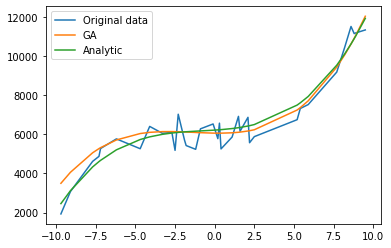

In [544]:
new_population = np.random.randint(low=0, high=10000, size=population_size)
pop = run_all(new_population)
plot_all(pop)

#### Answer 5

We were limited by using int instead of float. 
I have just updated a few place: np.random.uniform (especially at creation of the first generation)
The algo converge must faster and more accuratly.
I have keep the threshold but I could change it to make the result more accurate
I didn't update all the function but theorically it should be done.


In [545]:
def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.uniform(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] * random_value / 100
    return offspring_recombination

In [546]:
def get_score(data, new_population):
    score_f = fitness_function(data, new_population)
    score = round(1/np.max(score_f),5)
    return score

In [651]:
def run_all(new_population, modulo_rate=1-):
    score = get_score(data, new_population)
    generation = 0
    while (score > threshold):
        generation += 1
        fitness = fitness_function(data, new_population)
        parents = biased_selection(new_population, fitness, number_of_parents)
        offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
        offspring_mutation = mutation(offspring_recombination)
        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation
        score = get_score(data, new_population)
        if generation % modulo_rate == 0:
            print(f"generation:{generation}, score:{score}")
    fitness = fitness_function(data, new_population)
    best_match_idx = np.where(fitness == np.max(fitness))
    print("Generation:", generation, "score:", score, "Our solution: ", new_population[best_match_idx, :])
    return new_population[best_match_idx, :]

SyntaxError: invalid syntax (<ipython-input-651-d77c3d8117c1>, line 1)

generation:10, score:28767341.52619
Generation: score: 10751332.04874 17 Our solution:  [[[   6.05289461   16.29965079  -55.53922068 5791.40920455]]]
Analytic solution: [4.8, 12.1, 53.2, 6219] , fitness score: 9.589037792186927e-08


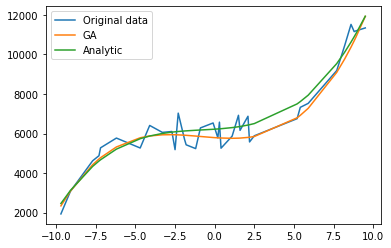

In [548]:
threshold = 13567890
new_population = np.random.uniform(low=0, high=10000, size=population_size)
pop = run_all(new_population)
plot_all(pop)

## Part 2: Solving Different Problems With the Same GA

Below is a reminder of the K-Means algorithm you implemented in Assignment 21X.

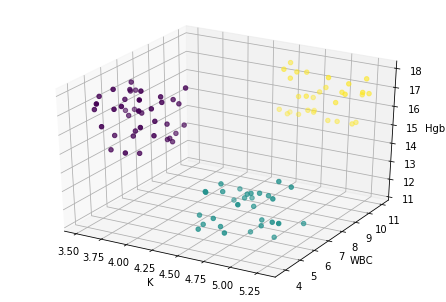

In [549]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

xlsx = pd.ExcelFile('EMR-Blood.xlsx')
sheet1 = xlsx.parse(0)
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

### Challenge 232
Solve the same clustering problem with a GA **without assuming K** (no iteration over differnet Ks), by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

**hint: You can build the population as the cluster assignment of each point or as cluster centers (consider coordinates boundaries)

#### Answer

most of the architecture has been kept. Some modifications with the following function
fitness is using silhouette, score function is adapted for negative number of silhouette. Mutation are done on any possible class, the function has been update to be able to mute at a adjustable percentage: in the previous exercice the chromosome was small (4 float) now it contains 100 int so need this modification for the convergence.


The real improvement for the convergence was to inscrease the elit (number of parent we keep for sure)

In [585]:
from sklearn.metrics import silhouette_score

def fitness_function(data, pop):
    fitness = []
    for gene in pop:
        fitness.append(silhouette_score(data, gene))
    return fitness

def get_score(data, new_population):
    score = np.max(fitness_function(data, new_population))
    if score < 0:
        return 500
    return 1/ score

def mutation(offspring_recombination):
    mutation_size = offspring_recombination.shape[1] * mutation_rate // 100
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(0, nb_cluster, mutation_size)
        random_index = np.random.randint(0, offspring_recombination.shape[1], mutation_size)
#         print("before", offspring_recombination[idx][random_index] )
        offspring_recombination[idx][random_index] = random_value
#         print("after ", offspring_recombination[idx][random_index] )
    return offspring_recombination

generation:10, score:500
generation:20, score:500
generation:30, score:500
generation:40, score:500
generation:50, score:500
generation:60, score:500
generation:70, score:500
generation:80, score:500
generation:90, score:500
generation:100, score:500
generation:110, score:500
generation:120, score:17.7426378238073
generation:130, score:9.392035610129408
generation:140, score:6.564636361227863
generation:150, score:5.252019595057841
generation:160, score:4.944987388581221
generation:170, score:4.944987388581221
generation:180, score:4.802632255339226
generation:190, score:4.48302371067634
generation:200, score:4.46782709708496
generation:210, score:4.358242504701257
generation:220, score:4.058055863538616
generation:230, score:4.058055863538616
Generation: score: 3.9632286151634255 235 Our solution:  [[[1 3 0 2 4 0 2 2 0 0 4 2 0 4 3 0 3 2 0 0 1 2 0 4 3 0 3 3 0 0 2 3 0 4 1
   0 4 1 0 0 1 3 0 3 1 0 1 3 0 0 4 4 0 1 3 0 4 3 0 0 4 4 0 2 3 0 1 3 0 0
   4 3 0 1 3 0 3 3 0 0 4 3 0 4 3 0 4 3 0 0 

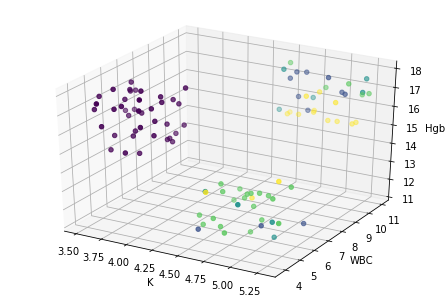

In [590]:
data = EMR3d1
threshold = 4
formula_degree = data.shape[0]
nb_cluster = 5
mutation_rate = 3
keep_elite = 5
population_size = (number_of_solutions, formula_degree) 

new_population = np.random.randint(low=0, high=nb_cluster, size=population_size)
pop = run_all(new_population)
make_chart(data, pop[0][0], variables1)

Starting with 5 clusters we obtain reasonable result relatively quickly. We could increase the precision but it will take a bit longer

## Challenge 233: Reconstruct Image (Bonus)
In this part you will attemp to generate an image which is closest to a target image given. 

First we will load the image from a file:


In [1]:
import matplotlib.image as mpimg

img=mpimg.imread('pexels-photo-57905.jpeg')

For simplicity (and running time), we focus on a small part of the image:

In [2]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img[100:200,200:300,0])

And we will define this part as out target image to reconstruct:

In [595]:
target = img[100:200,200:300,0]

Your mission is to generate an image starting at random noise. The goal is to get an image as close as possible to the target. Don;t worry if it's still noisy...
FYI: GA are not the best solution for these types of problems ;)
You can use these blog posts to give you ideas:
https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

https://heartbeat.fritz.ai/reproducing-images-using-a-genetic-algorithm-with-python-91fc701ff84

In [598]:
print(target)
print(target.shape)

[[134 135 137 ... 106 105 104]
 [134 136 137 ... 105 103 102]
 [132 134 135 ... 103 102 101]
 ...
 [ 68  41  40 ... 190 194 197]
 [128  75  46 ... 193 196 199]
 [188 114  60 ... 194 197 200]]
(100, 100)


In [680]:
# Your code here
def fitness_function(data, pop):
    fitness = []
    
    for gene in pop:
        error = np.sum((data - gene)**2)
        fitness.append(1 / error)
    return fitness

def mutation(offspring_recombination):
    mutation_size = offspring_recombination.shape[1] * mutation_rate // 100
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.uniform(-10, 10, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1], mutation_size)
        offspring_recombination[idx][random_index] = (offspring_recombination[idx][random_index] + offspring_recombination[idx][random_index] * random_value // 100) % 255
    return offspring_recombination


def get_score(data, new_population):
    return 1 / np.max(fitness_function(data, new_population))


generation:1000, score:25575943.0
generation:2000, score:17186178.0
Generation: 2772 score: 13542603.0 Our solution:  [[[130  43 131 ... 174 187 118]]]


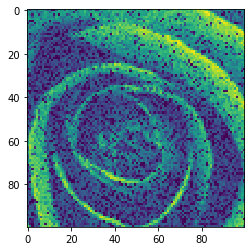

In [691]:
threshold = 13543210
modulo_rate = 1000
mutation_rate = 1

data = target.reshape(-1, target.shape[0] * target.shape[1])
formula_degree = data.shape[1]
population_size = (number_of_solutions, formula_degree)
new_population = np.random.randint(low=0, high=255, size=population_size)
pop = run_all(new_population, modulo_rate)
new_img = pop[0][0].reshape(target.shape[0], target.shape[1])
imgplot = plt.imshow(new_img)